In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.2 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#method : scaling, log transformation, cube Root normalization, Box-Cox transformation
from scipy.stats import skew 
from scipy.stats import boxcox

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.shape

(319795, 18)

In [ ]:
df = df.drop_duplicates()
df.shape

(301717, 18)

In [ ]:
# noise 처리
df = df[(df['BMI'] < 80) & (df['SleepTime'] != 24)]
df.shape

(301653, 18)

In [ ]:
def yesno_tolabel(x):
    if (x == 'Yes') | (x == 'Yes (during pregnancy)') :
        return 1
    else:
        return 0

In [ ]:
sex_map = {'Female' : 0, 'Male' : 1}
health_map = {'Excellent' : 4, 'Very good' : 3, 'Good' : 2, 'Fair' : 1, 'Poor' : 0}
diabetic_map = {'Yes' : 2, 'Yes (during pregnancy)' : 2, 'No, borderline diabetes' : 1, 'No' : 0}
age_map = {'18-24' : 20, '25-29' : 25, '30-34' : 30, '35-39' : 35, '40-44' : 40, '45-49' : 45, '50-54' : 50, '55-59' : 55, '60-64' : 60, '65-69' : 65, '70-74' : 70, '75-79' : 75, '80 or older' : 80}
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
diabetic_map = {'Yes' : 2, 'Yes (during pregnancy)' : 2, 'No, borderline diabetes' : 1, 'No' : 0}
for column in columns:
    df[column] = df[column].apply(lambda x : yesno_tolabel(x))

df['Sex'] = df['Sex'].map(sex_map)
df['GenHealth'] = df['GenHealth'].map(health_map)
df['Diabetic'] = df['Diabetic'].map(diabetic_map)
df['AgeCategory'] = df['AgeCategory'].map(age_map)

In [ ]:
df

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking  Sex  AgeCategory      Race  Diabetic  \
0               30.0            0    0           55     White         2   
1                0.0            0    0           80     White         0   
2               30.0            0    1           65     White         2   
3                0.0            0    0           75     White         0   
4                0.0            1    0           40     White         0   
...              ...          ...  ...          ...       ...       ...   
319790           0.0            1    1           60  Hispanic         2   
319791           0.0            0    1           35  Hispanic         0   
319792           0.0            0    0           45  Hispanic         0   
319793           0.0            0    0           25  Hispanic         0   
319794           0.0            0    0           80  Hispanic         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          3        5.0       1              0   
1                      1          3        7.0       0              0   
2                      1          1        8.0       1              0   
3                      0          2        6.0       0              0   
4                      1          3        8.0       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0          1        6.0       1              0   
319791                 1          3        5.0       1              0   
319792                 1          2        6.0       0              0   
319793                 0          2       12.0       0              0   
319794                 1          2        8.0       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[301653 rows x 18 columns]

In [ ]:
def quantile_operation(outlier_df, column):
    quantile_1 = outlier_df[column].quantile(0.25)
    quantile_3 = outlier_df[column].quantile(0.75)
    iqr = quantile_3 - quantile_1
    Lower_tail = quantile_1 - 1.5 * iqr
    Upper_tail = quantile_3 + 1.5 * iqr

    return Lower_tail, Upper_tail

In [ ]:
df['PhysicalHealth'] = df['PhysicalHealth'] + 1
df['MentalHealth'] = df['MentalHealth'] + 1
outlier_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
for column in outlier_columns:
    Lower_tail, Upper_tail = quantile_operation(df, column)
    df[column] = boxcox(df[column])[0]

In [ ]:
#Race 인코딩 - Binary
import category_encoders as ce
import pandas as pd

ce_binary = ce.BinaryEncoder(cols = ['Race'], return_df = True)
ce_binary_encoded = ce_binary.fit_transform(df['Race'])

df = pd.concat([df, ce_binary_encoded], axis = 1).drop(['Race'], axis = 1)

In [ ]:
df

HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                  0  1.403407        1                0       0   
1                  0  1.442302        0                0       1   
2                  0  1.487128        1                0       0   
3                  0  1.472250        0                0       0   
4                  0  1.468816        0                0       0   
...              ...       ...      ...              ...     ...   
319790             1  1.491857        1                0       0   
319791             0  1.504497        1                0       0   
319792             0  1.472452        0                0       0   
319793             0  1.517915        0                0       0   
319794             0  1.561599        0                0       0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Diabetic  \
0             0.669364      1.089487            0    0           55         2   
1             0.000000      0.000000            0    0           80         0   
2             0.801003      1.089487            0    1           65         2   
3             0.000000      0.000000            0    0           75         0   
4             0.807551      0.000000            1    0           40         0   
...                ...           ...          ...  ...          ...       ...   
319790        0.755892      0.000000            1    1           60         2   
319791        0.000000      0.000000            0    1           35         0   
319792        0.000000      0.000000            0    0           45         0   
319793        0.000000      0.000000            0    0           25         0   
319794        0.000000      0.000000            0    0           80         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          3   3.488639       1              0   
1                      1          3   5.054525       0              0   
2                      1          1   5.813435       1              0   
3                      0          2   4.280563       0              0   
4                      1          3   5.813435       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0          1   4.280563       1              0   
319791                 1          3   3.488639       1              0   
319792                 1          2   4.280563       0              0   
319793                 0          2   8.734516       0              0   
319794                 1          2   5.813435       0              0   

        SkinCancer  Race_0  Race_1  Race_2  
0                1       0       0       1  
1                0       0       0       1  
2                0       0       0       1  
3                1       0       0       1  
4                0       0       0       1  
...            ...     ...     ...     ...  
319790           0       1       1       0  
319791           0       1       1       0  
319792           0       1       1       0  
319793           0       1       1       0  
319794           0       1       1       0  

[301653 rows x 20 columns]

In [ ]:
# x y분리
x=df.drop('HeartDisease', axis=1)
x_columns=x.columns
y=df['HeartDisease']

In [ ]:
# train test 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2,random_state = 42)

In [ ]:
# 데이터 불균형 처리 전 상태

print('origin target data :\n', df['HeartDisease'].value_counts())

origin target data :
 0    274401
1     27252
Name: HeartDisease, dtype: int64


In [ ]:
from sklearn.metrics import *

# 모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    metrics(y_test,pred)
    
# 평가
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    matrix = confusion_matrix(y_test, pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')

    print('Accuracy: ', format(accuracy,'.4f'),'\n')
    print('Precision: ', format(precision,'.4f'),'\n')
    print('Recall: ', format(recall,'.4f'),'\n')
    print('F1_score: ', format(f1,'.4f'),'\n')
    print('Roc_score: ', format(roc_score,'.4f'),'\n')
    print('Confusion Matrix:','\n', matrix)

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
modeling(lgb,x_train,x_test,y_train,y_test)

Accuracy:  0.9086 

Precision:  0.4889 

Recall:  0.1046 

F1_score:  0.1724 

Roc_score:  0.5468 

Confusion Matrix: 
 [[54245   600]
 [ 4912   574]]


In [ ]:
##오버샘플링 처리
from imblearn.over_sampling import *

#SMOTE
x_train_SMOTE, y_train_SMOTE =SMOTE(random_state=42).fit_resample(x_train, y_train)

#BorderlineSMOTE
x_train_BorderlineSM, y_train_BorderlineSM =BorderlineSMOTE(random_state=42).fit_resample(x_train, y_train)

#SVMSMOTE
x_train_SVMSMOTE, y_train_SVMSMOTE =SVMSMOTE(random_state=42).fit_resample(x_train, y_train) 

#ADASYN
x_train_ADASYN, y_train_ADASYN =ADASYN(random_state=42).fit_resample(x_train, y_train)

In [ ]:
print('SMOTE 결과')
model_SMOTE=modeling(lgb,x_train_SMOTE,x_test, y_train_SMOTE,y_test)
model_SMOTE
print('\n\n')
print('BorderlineSMOTE 결과')
model_Borderline=modeling(lgb,x_train_BorderlineSM,x_test, y_train_BorderlineSM,y_test)
model_Borderline
print('\n\n')
print('SVMSMOTE 결과')
model_SVM=modeling(lgb,x_train_SVMSMOTE,x_test, y_train_SVMSMOTE,y_test)
model_SVM
print('\n\n')
print('ADASYN 결과')
model_ADASYN=modeling(lgb,x_train_ADASYN,x_test, y_train_ADASYN,y_test)
model_ADASYN
print('\n\n')

SMOTE 결과
Accuracy:  0.8580 

Precision:  0.2741 

Recall:  0.3407 

F1_score:  0.3038 

Roc_score:  0.6252 

Confusion Matrix: 
 [[49896  4949]
 [ 3617  1869]]



BorderlineSMOTE 결과
Accuracy:  0.8585 

Precision:  0.2768 

Recall:  0.3447 

F1_score:  0.3070 

Roc_score:  0.6273 

Confusion Matrix: 
 [[49904  4941]
 [ 3595  1891]]



SVMSMOTE 결과
Accuracy:  0.8761 

Precision:  0.3225 

Recall:  0.3299 

F1_score:  0.3262 

Roc_score:  0.6303 

Confusion Matrix: 
 [[51043  3802]
 [ 3676  1810]]



ADASYN 결과
Accuracy:  0.8529 

Precision:  0.2614 

Recall:  0.3381 

F1_score:  0.2949 

Roc_score:  0.6213 

Confusion Matrix: 
 [[49604  5241]
 [ 3631  1855]]





In [ ]:
# 복합 샘플링 진행 
from imblearn.combine import *

#SMOTEENN
x_train_SMOTEENN, y_train_SMOTEENN =SMOTEENN(random_state=42).fit_resample(x_train, y_train)

In [ ]:
print('SMOTEENN 결과\n')
model_SMOTEENN=modeling(lgb,x_train_SMOTEENN,x_test, y_train_SMOTEENN,y_test)
model_SMOTEENN

SMOTEENN 결과

Accuracy:  0.8307 

Precision:  0.2803 

Recall:  0.5503 

F1_score:  0.3715 

Roc_score:  0.7045 

Confusion Matrix: 
 [[47095  7750]
 [ 2467  3019]]


In [ ]:
#복합 샘플링 결과
print('befor combinesampling :\n', y_train.value_counts())
print('\nAfter SMOTEENN :\n', y_train_SMOTEENN.value_counts())

befor combinesampling :
 0    219556
1     21766
Name: HeartDisease, dtype: int64

After SMOTEENN :
 1    173552
0    163441
Name: HeartDisease, dtype: int64


In [ ]:
#costsensetive
lgb_cost = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False, class_weight='balanced')
modeling(lgb_cost,x_train,x_test,y_train,y_test)

Accuracy:  0.7808 

Precision:  0.2453 

Recall:  0.6790 

F1_score:  0.3604 

Roc_score:  0.7350 

Confusion Matrix: 
 [[43382 11463]
 [ 1761  3725]]


In [ ]:
# 하이퍼파라미터
lgb_hyper = LGBMClassifier(n_estimators=1000,num_leaves=64,num_iterations=1000,learning_rate=0.05,min_child_samples=30,max_depth=15, boosting='dart')
modeling(lgb_hyper,x_train,x_test,y_train,y_test)

Accuracy:  0.9108 

Precision:  0.5656 

Recall:  0.0802 

F1_score:  0.1405 

Roc_score:  0.5370 

Confusion Matrix: 
 [[54507   338]
 [ 5046   440]]


In [ ]:
print('SMOTE 결과')
modeling(lgb_hyper,x_train_SMOTE,x_test, y_train_SMOTE,y_test)
print('\n\n')
print('BorderlineSMOTE 결과')
modeling(lgb_hyper,x_train_BorderlineSM,x_test, y_train_BorderlineSM,y_test)
print('\n\n')
print('SVMSMOTE 결과')
modeling(lgb_hyper,x_train_SVMSMOTE,x_test, y_train_SVMSMOTE,y_test)
print('\n\n')
print('ADASYN 결과')
modeling(lgb_hyper,x_train_ADASYN,x_test, y_train_ADASYN,y_test)

SMOTE 결과
Accuracy:  0.8487 

Precision:  0.2792 

Recall:  0.4200 

F1_score:  0.3354 

Roc_score:  0.6558 

Confusion Matrix: 
 [[48898  5947]
 [ 3182  2304]]



BorderlineSMOTE 결과
Accuracy:  0.8472 

Precision:  0.2791 

Recall:  0.4298 

F1_score:  0.3384 

Roc_score:  0.6594 

Confusion Matrix: 
 [[48754  6091]
 [ 3128  2358]]



SVMSMOTE 결과
Accuracy:  0.8677 

Precision:  0.3204 

Recall:  0.4056 

F1_score:  0.3580 

Roc_score:  0.6598 

Confusion Matrix: 
 [[50125  4720]
 [ 3261  2225]]



ADASYN 결과
Accuracy:  0.8424 

Precision:  0.2653 

Recall:  0.4143 

F1_score:  0.3234 

Roc_score:  0.6498 

Confusion Matrix: 
 [[48549  6296]
 [ 3213  2273]]


In [ ]:
print('SMOTETENN 결과\n\n')
modeling(lgb_hyper,x_train_SMOTEENN,x_test, y_train_SMOTEENN,y_test)

SMOTETENN 결과


Accuracy:  0.8175 

Precision:  0.2743 

Recall:  0.6117 

F1_score:  0.3787 

Roc_score:  0.7249 

Confusion Matrix: 
 [[45965  8880]
 [ 2130  3356]]


In [ ]:
#costsensetive
lgb_hyper_cost = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False, class_weight='balanced')
modeling(lgb_hyper_cost,x_train,x_test,y_train,y_test)

Accuracy:  0.7808 

Precision:  0.2453 

Recall:  0.6790 

F1_score:  0.3604 

Roc_score:  0.7350 

Confusion Matrix: 
 [[43382 11463]
 [ 1761  3725]]


In [ ]:
!pip install pdpbox
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 143 kB/s 
     |████████████████████████████████| 13.1 MB 1.7 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=fce8d0caa9eb41ca3775fe6e6cb0b36180a34393abd313d828da91c07bf4b2e3
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.1 MB/s 


In [ ]:
from pdpbox import pdp
import shap
print(x_test.columns)
#분포를 보기위해 yes no와 그 외로 피쳐 분리
feature = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',  'PhysicalActivity',   'Asthma', 'KidneyDisease',
       'SkinCancer', 'Diabetic']
feature2=['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory',  'GenHealth', 'SleepTime']
features = x_test.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_0', 'Race_1', 'Race_2'],
      dtype='object')


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


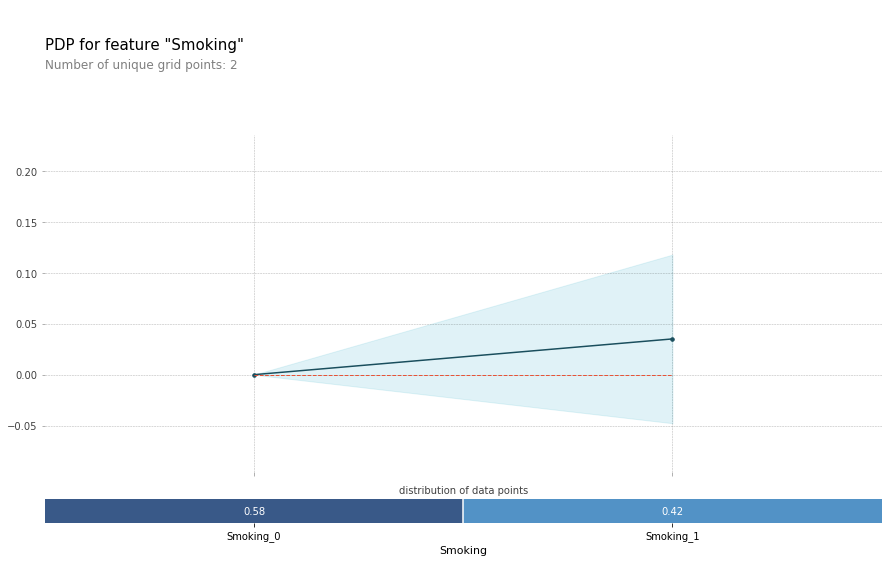

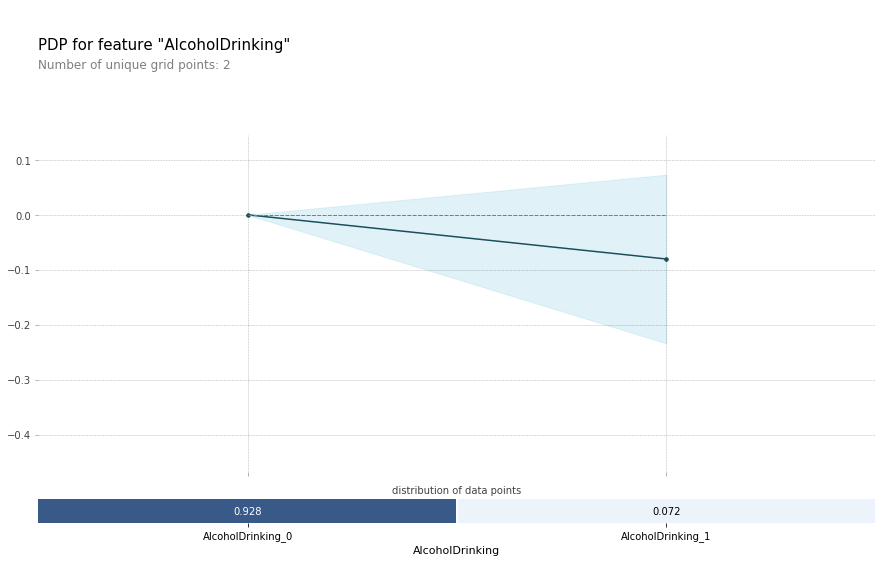

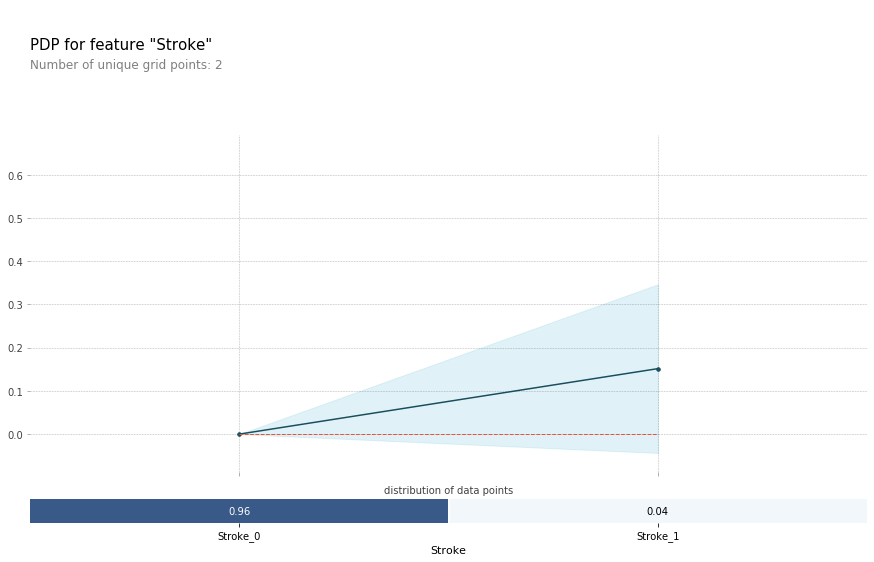

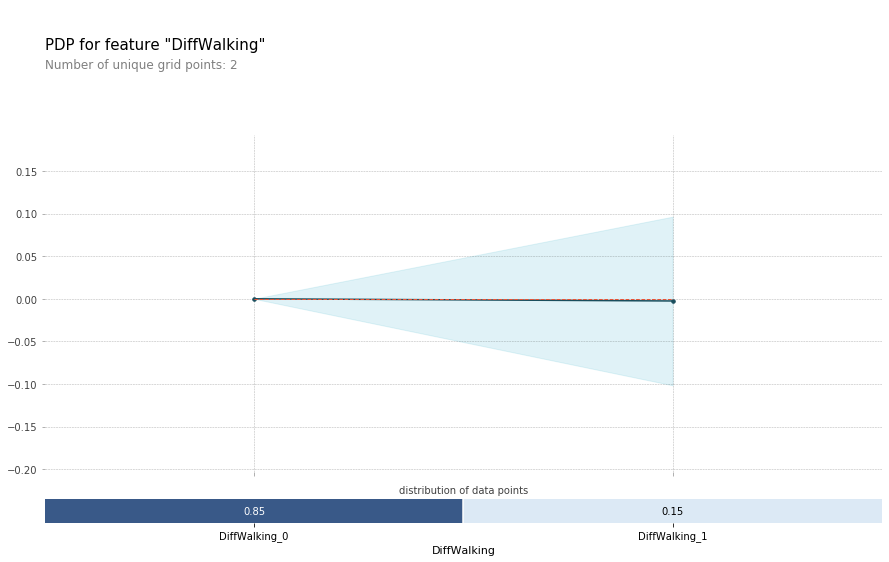

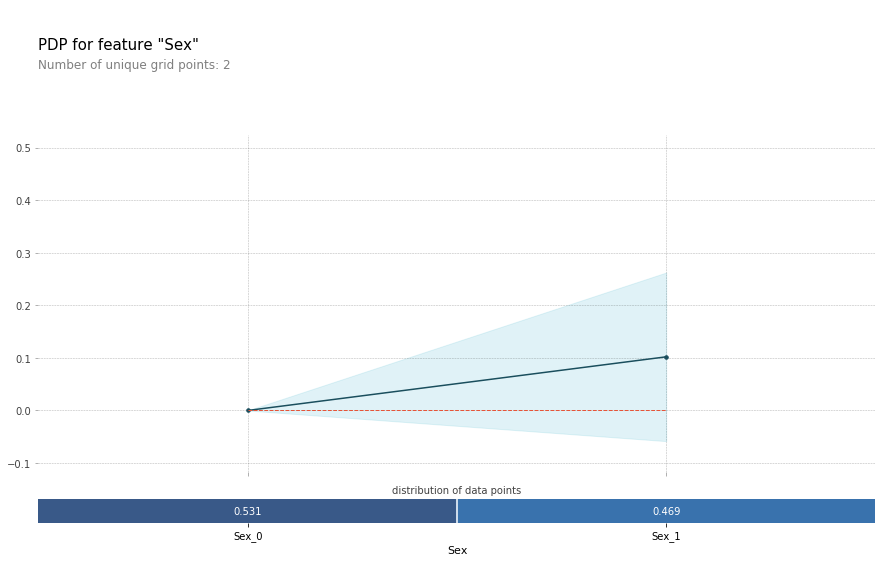

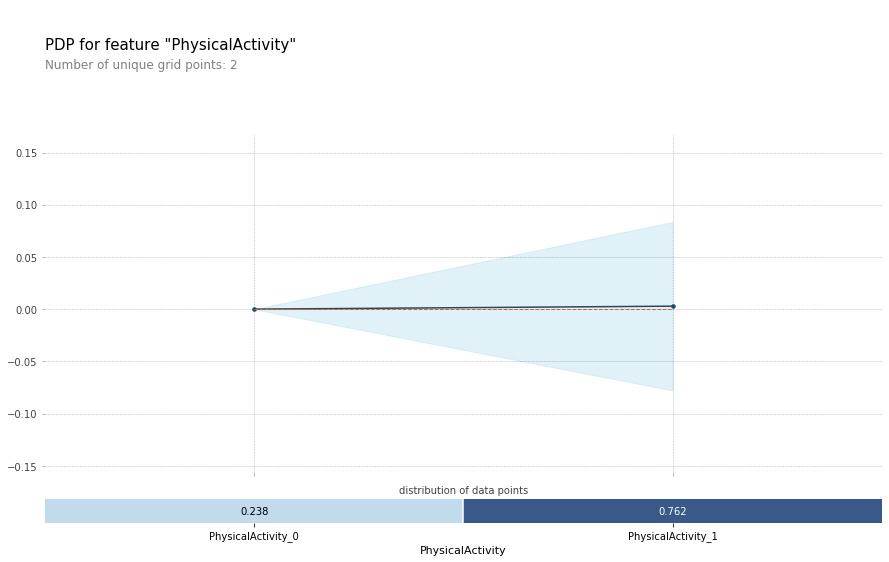

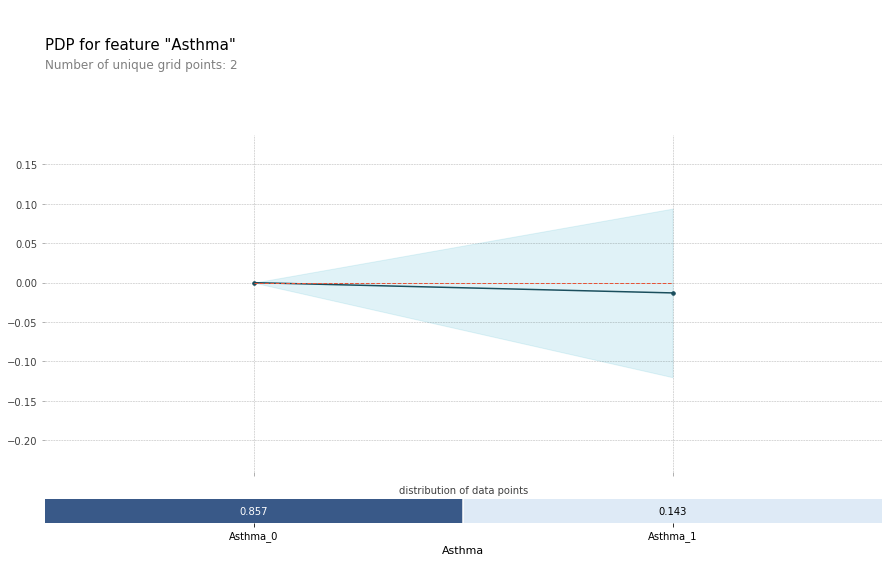

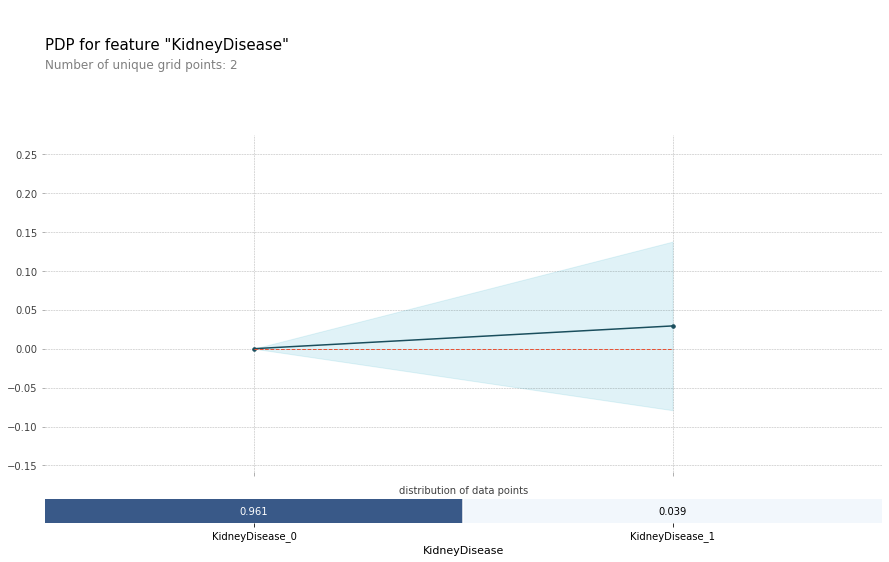

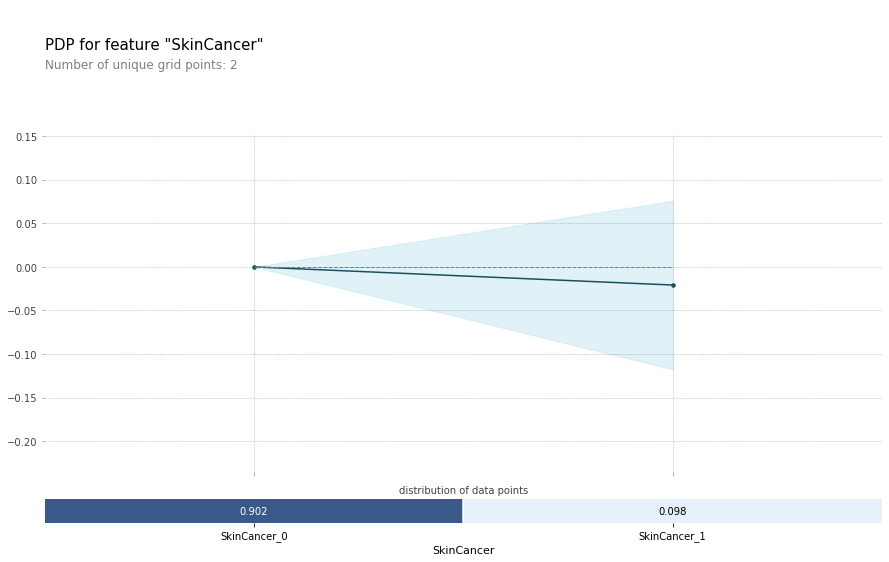

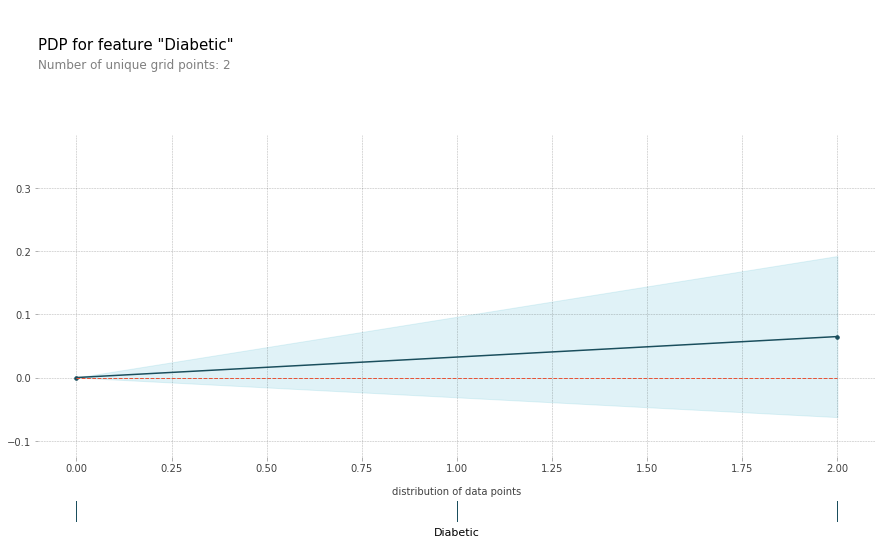

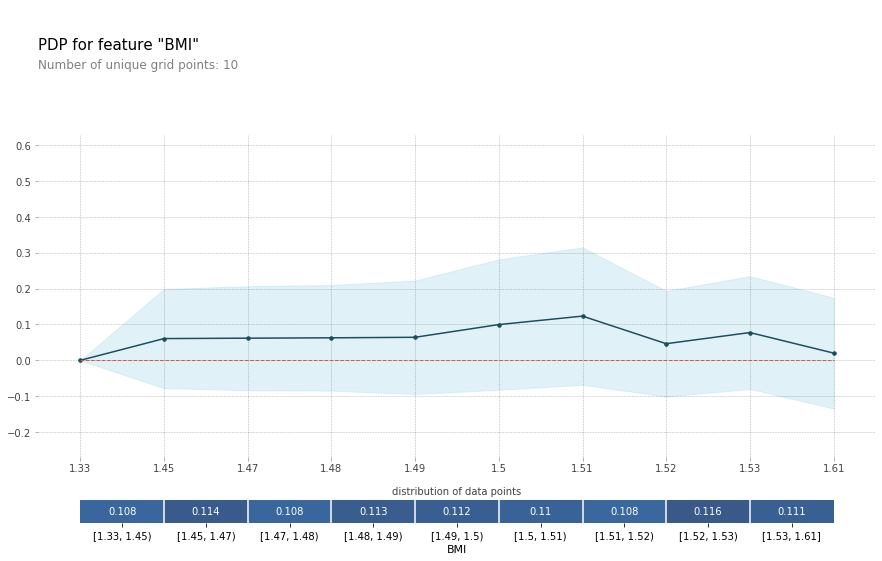

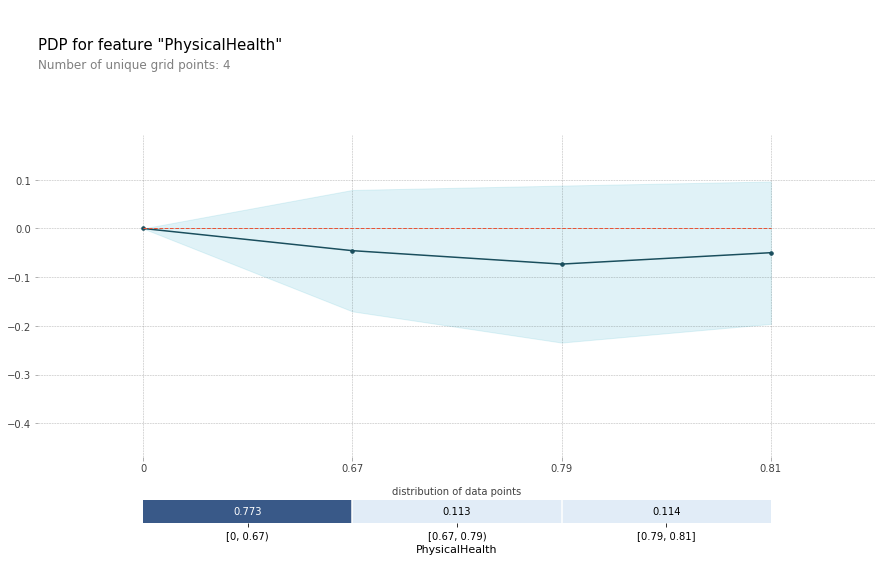

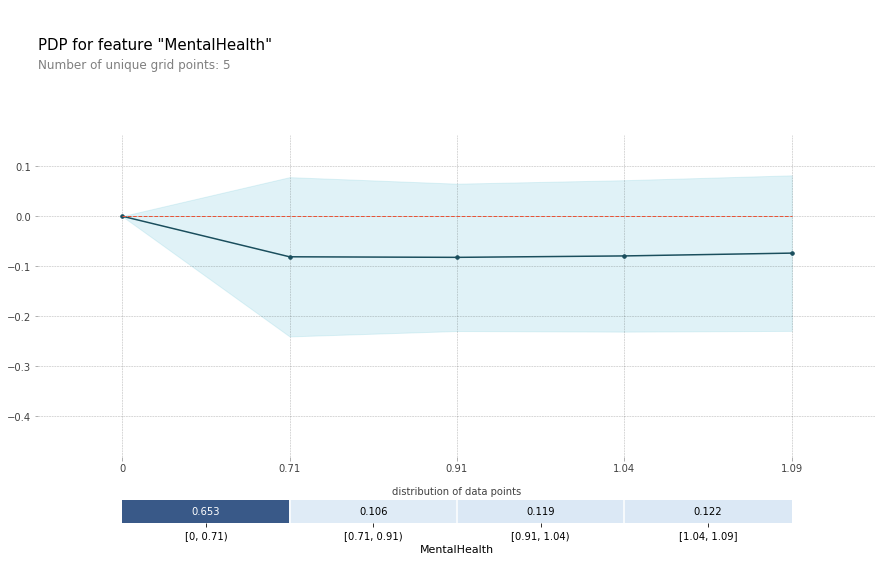

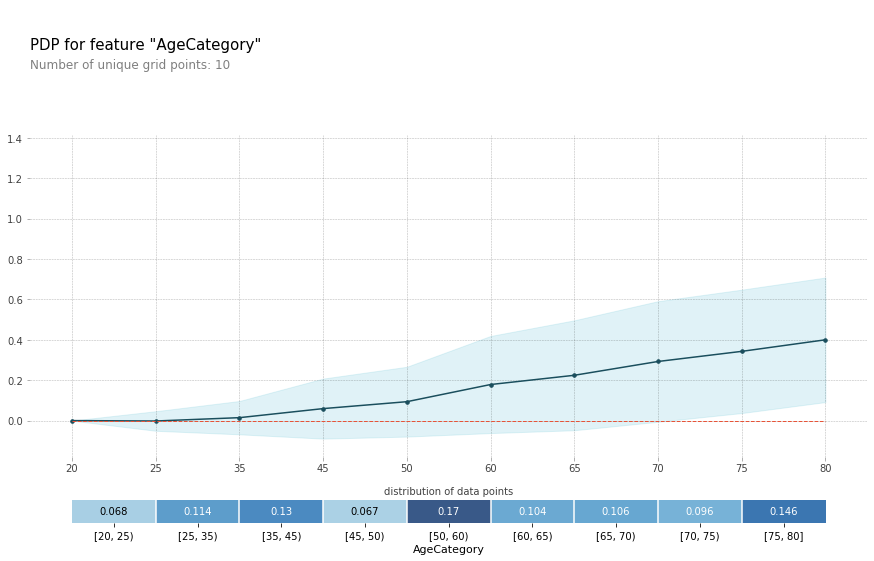

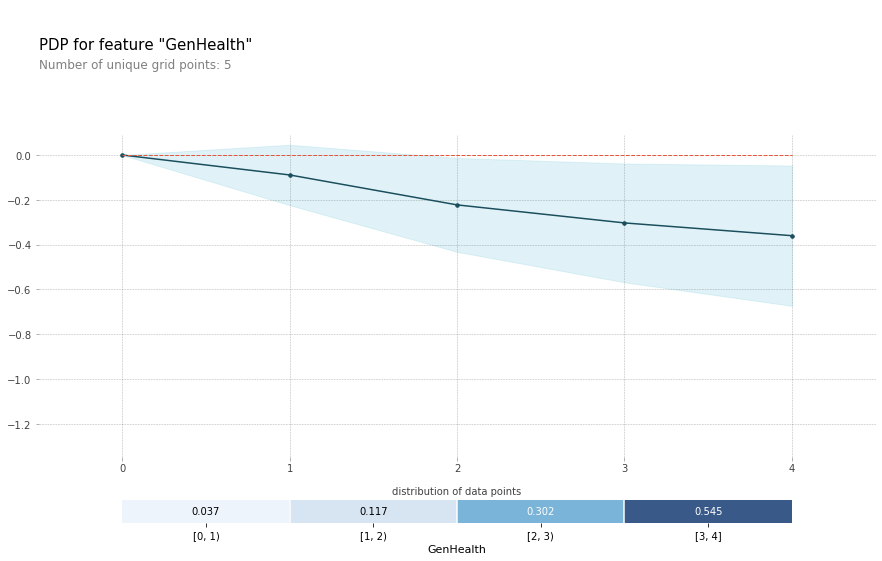

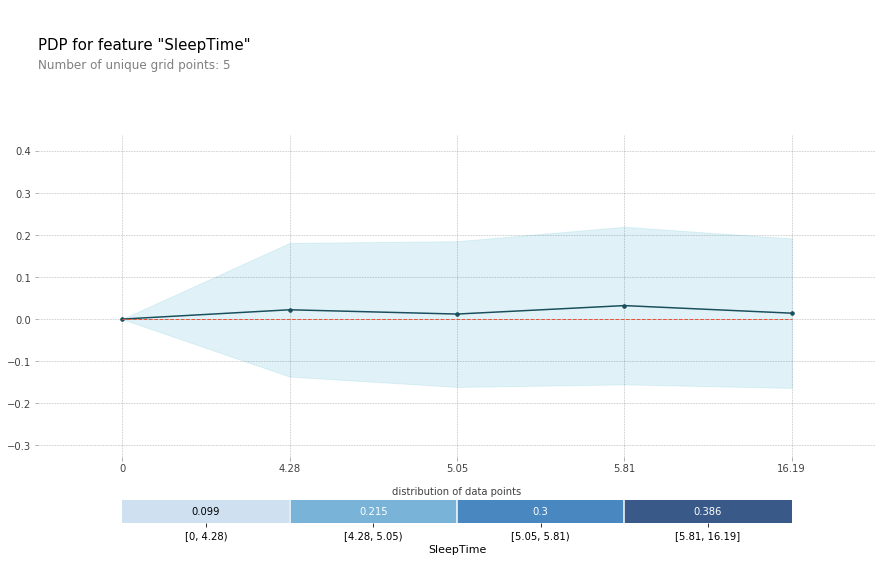

In [ ]:
# 샘플링 없는 pdp
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=lgb, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i], plot_pts_dist=True)
for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=lgb, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], plot_pts_dist=True,  x_quantile=True)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


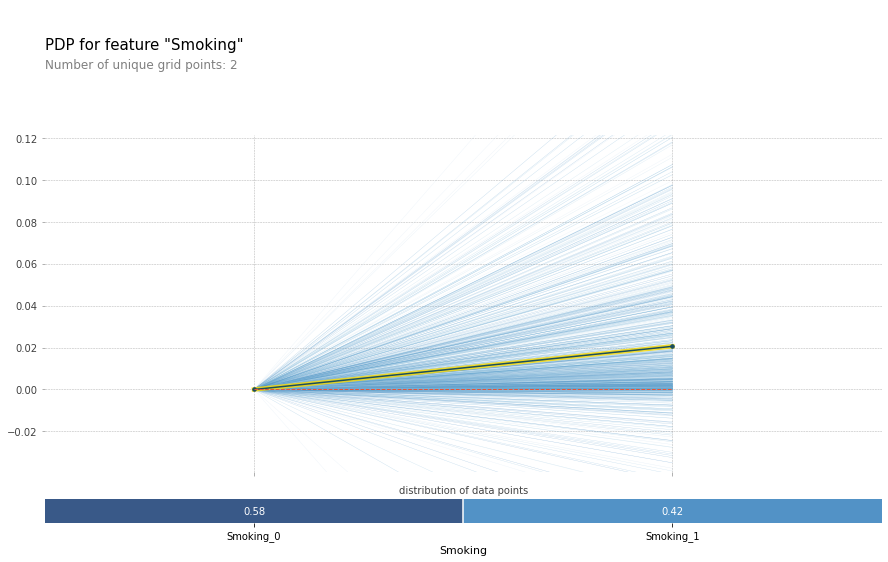

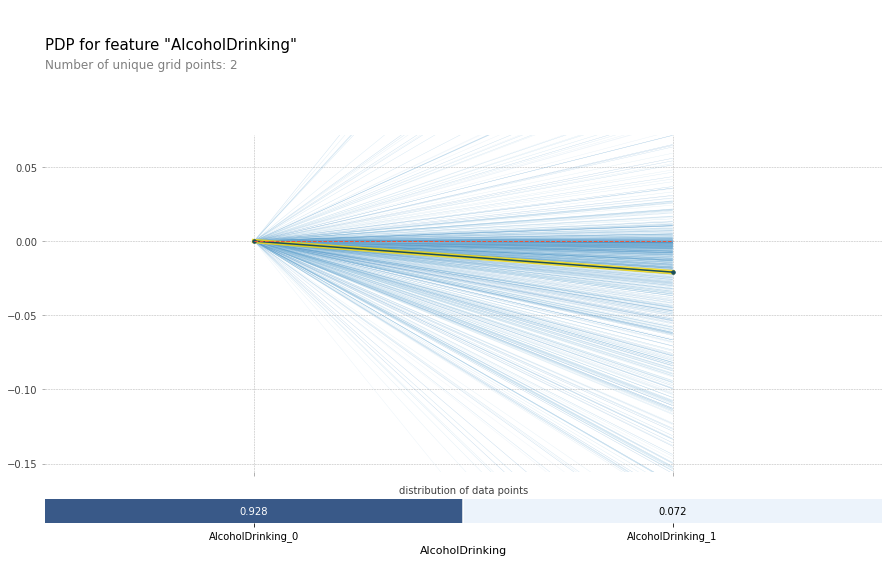

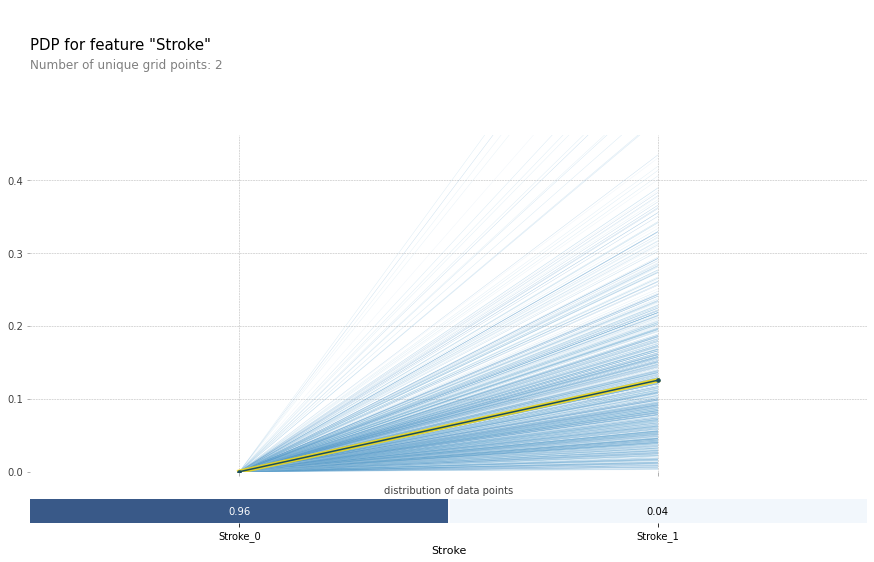

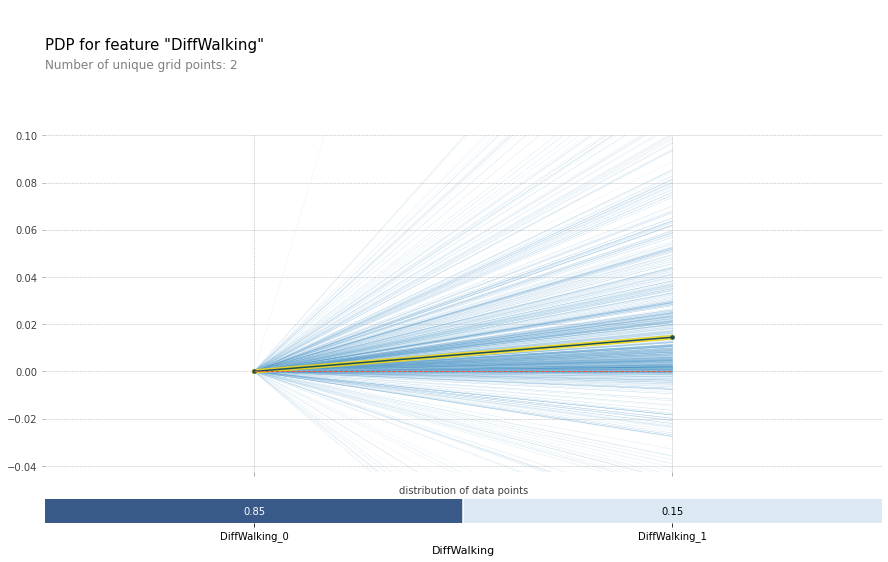

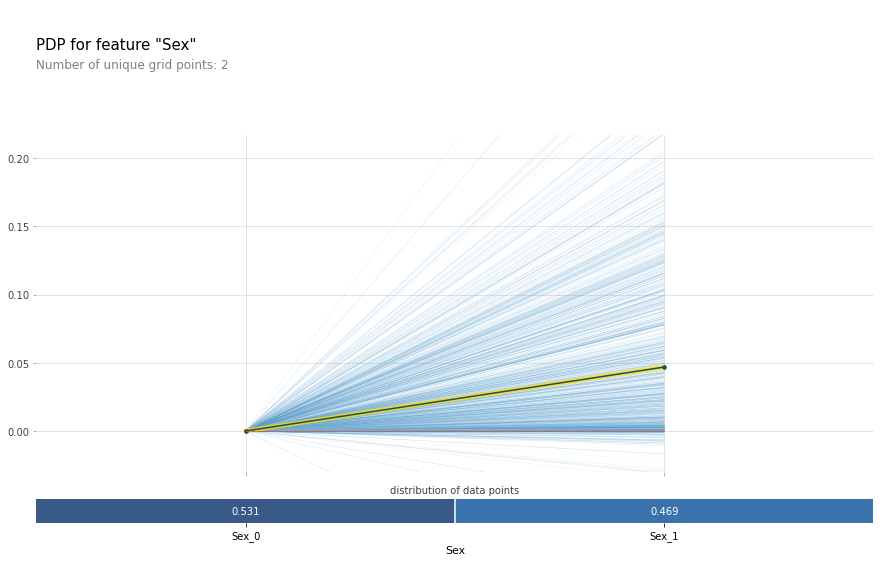

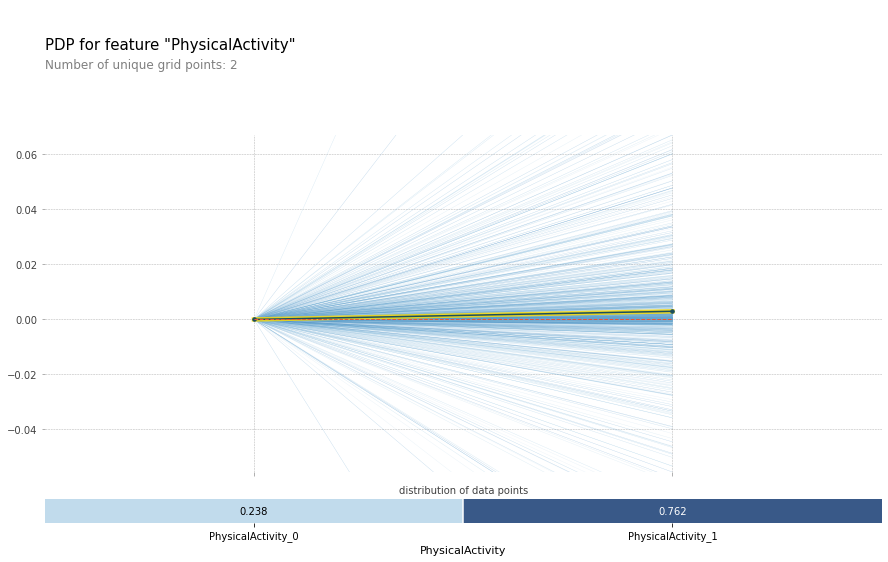

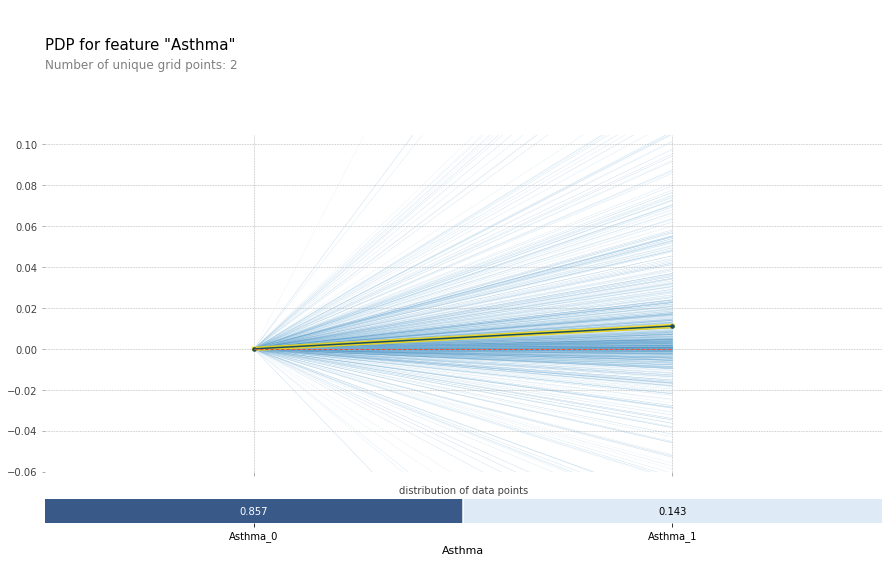

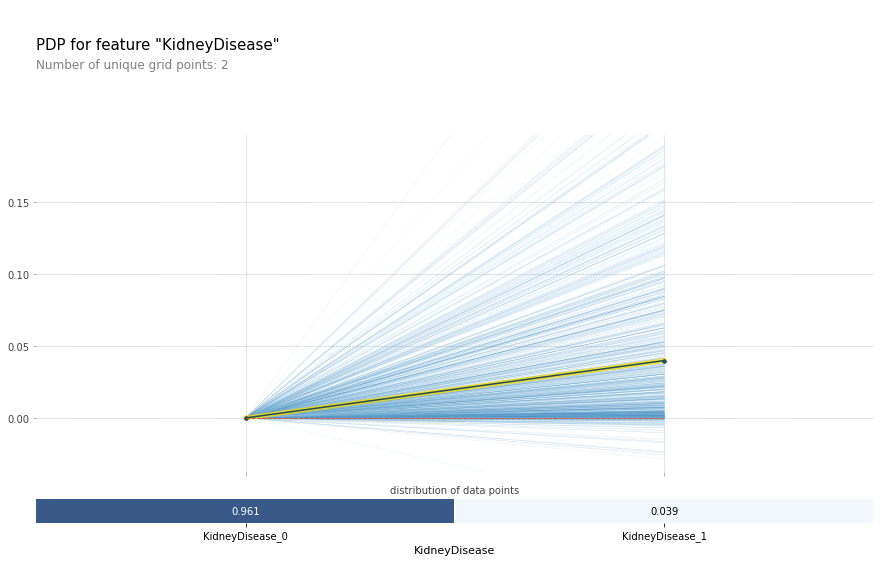

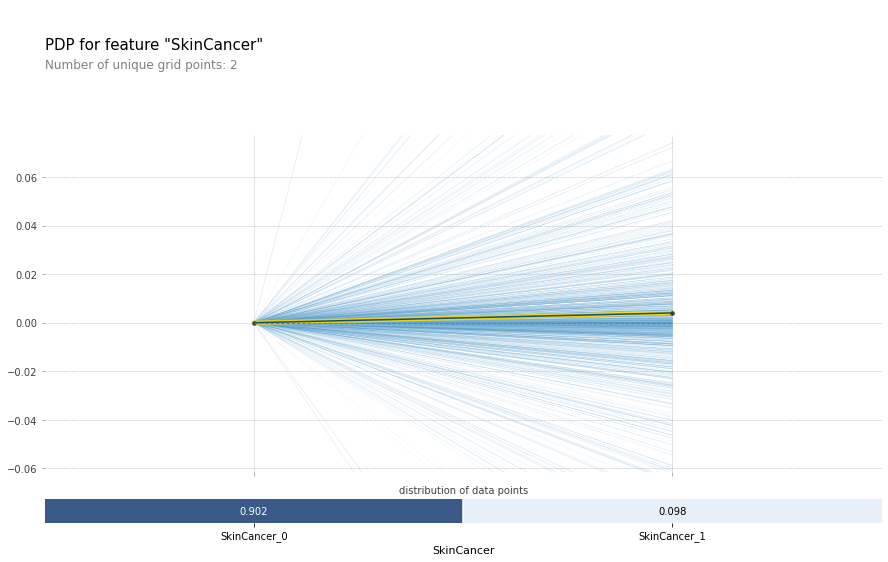

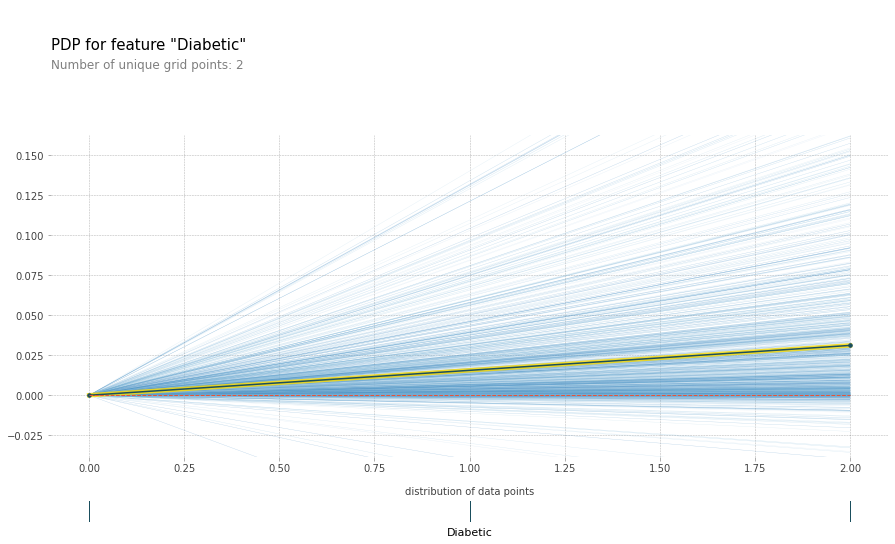

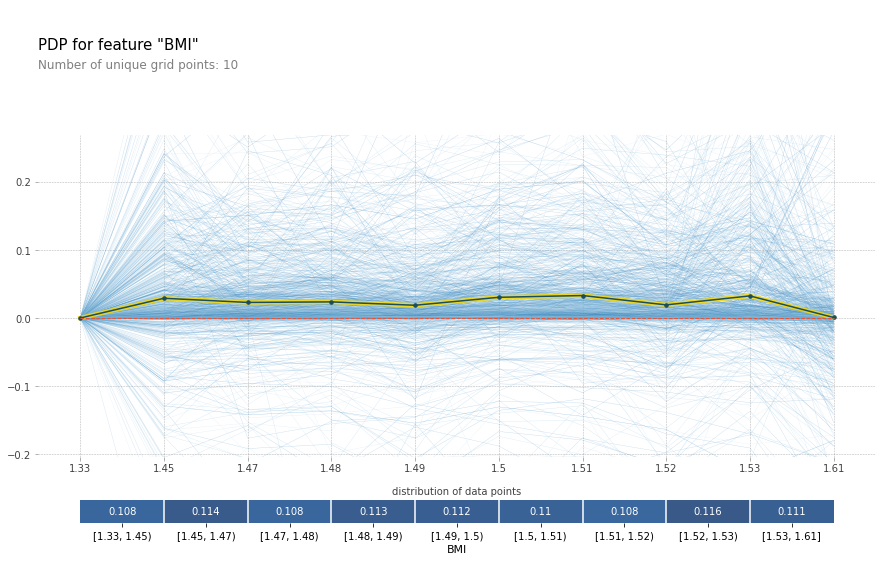

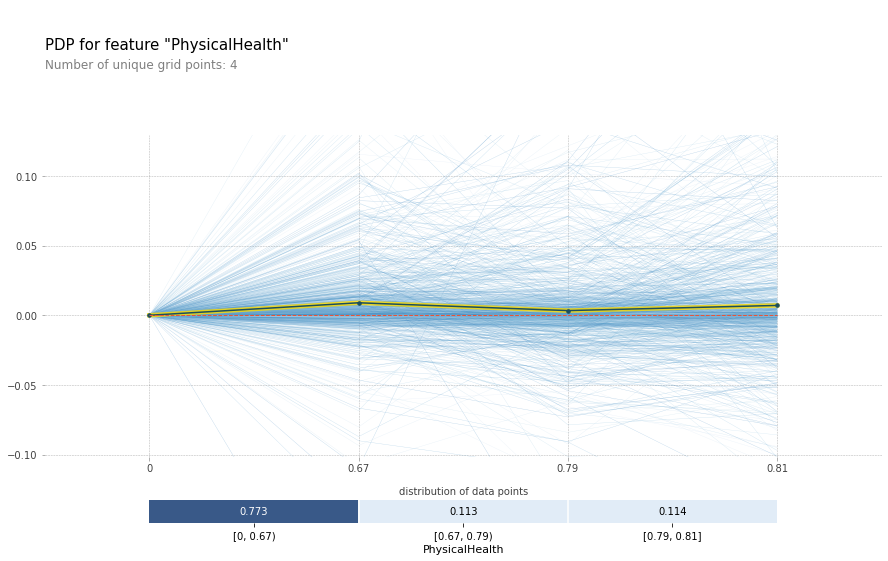

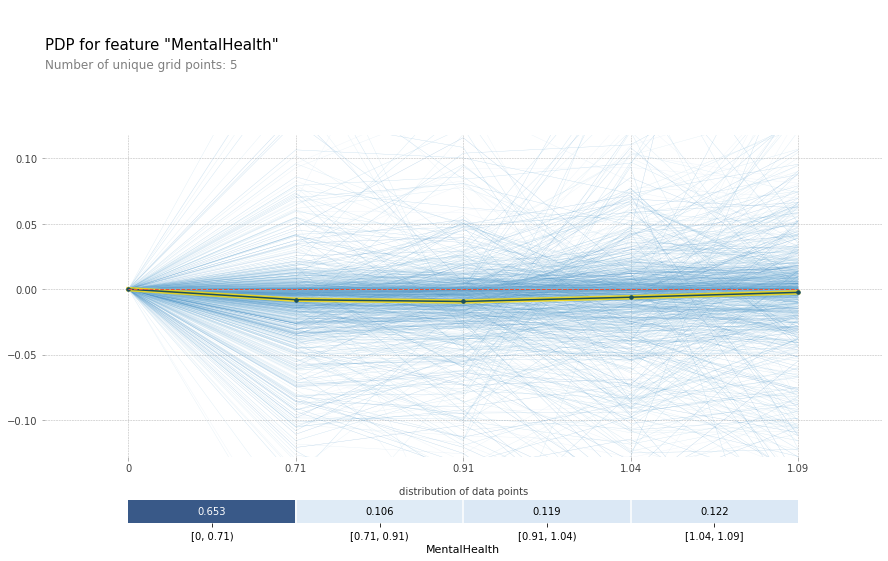

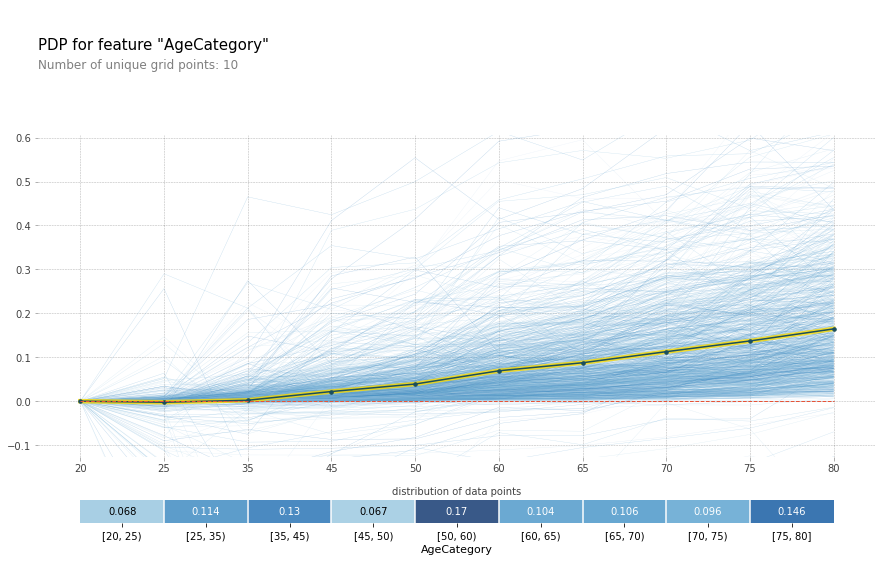

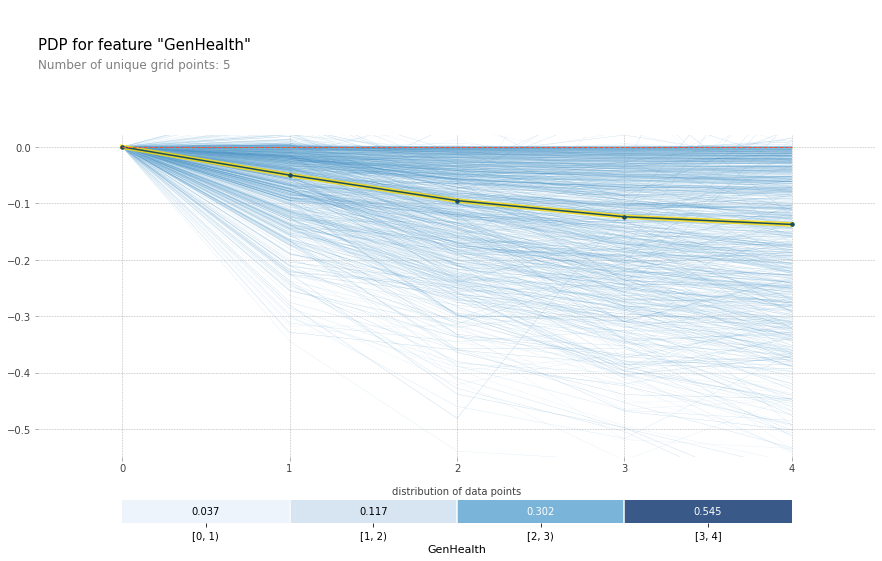

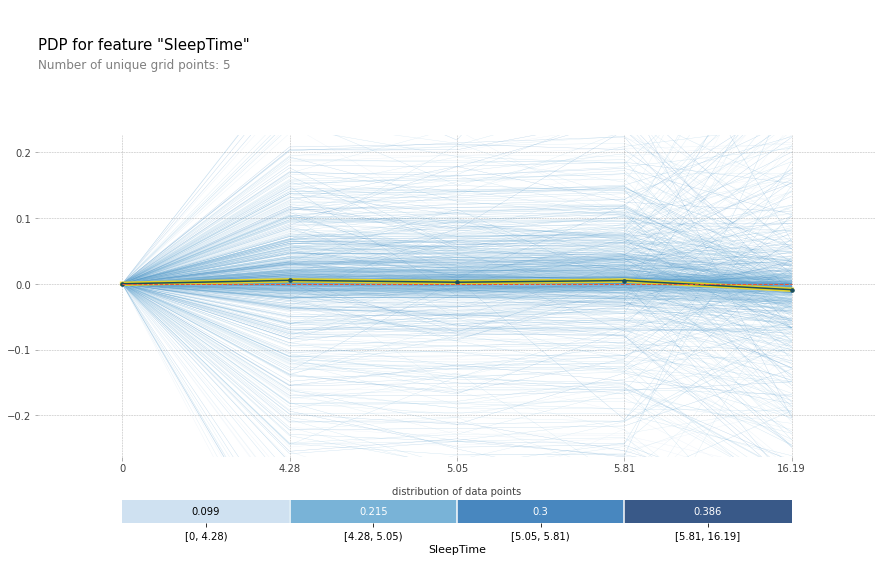

In [60]:
# 샘플링 적용안한 경우의 center ICE
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=lgb, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i],frac_to_plot=1000, plot_lines=True, plot_pts_dist=True)
for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=lgb, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], frac_to_plot=1000, plot_lines=True, plot_pts_dist=True,  x_quantile=True)

In [ ]:
# SHAP
model_lgb=  lgb.fit(x_train,y_train)

In [ ]:
explainer = shap.TreeExplainer(model_lgb)
shap_values = explainer.shap_values(x_test)

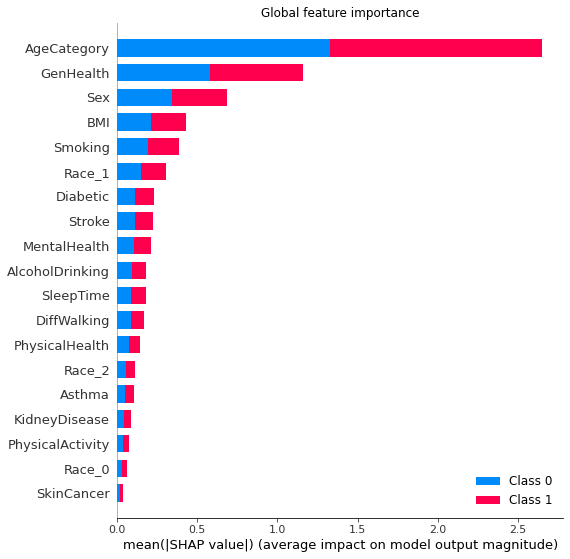

In [ ]:
plt.title('Global feature importance')
shap.summary_plot(shap_values, plot_type="bar",feature_names=features)